In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [6]:
# 2. Normalize the pixel values to [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0


In [8]:
# 3. One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [10]:
model = Sequential([
Flatten(input_shape=(28, 28)), # Flatten 28x28 images into 784 input neurons
Dense(128, activation='relu'), # Hidden layer with 128 neurons
Dense(64, activation='relu'), # Another hidden layer
Dense(10, activation='softmax') # Output layer with 10 classes (digits 0-9)
])

C:\Users\sharj\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
model.compile(optimizer='adam',

loss='categorical_crossentropy',
metrics=['accuracy'])

In [14]:
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - accuracy: 0.8594 - loss: 0.4804 - val_accuracy: 0.9588 - val_loss: 0.1364
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9654 - loss: 0.1148 - val_accuracy: 0.9655 - val_loss: 0.1138
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9791 - loss: 0.0716 - val_accuracy: 0.9687 - val_loss: 0.1069
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.9826 - loss: 0.0548 - val_accuracy: 0.9730 - val_loss: 0.0936
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.9870 - loss: 0.0411 - val_accuracy: 0.9736 - val_loss: 0.0994


In [20]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9707 - loss: 0.1037
Test Accuracy: 0.9740


In [22]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:
# Pick one image from the test set
index = 0 # you can change this to test different images
image = x_test[index]

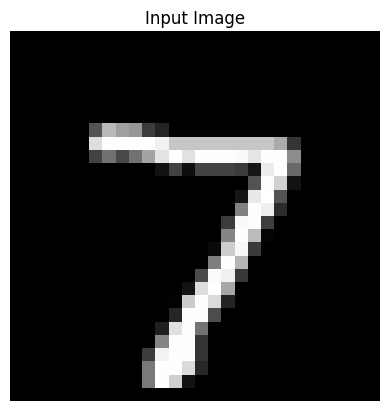

In [26]:
# Show the image
plt.imshow(image, cmap='gray')
plt.title("Input Image")
plt.axis('off')
plt.show()

In [28]:
# Prepare the image for prediction (reshape and scale if needed)
image_reshaped = image.reshape(1, 28, 28) # Shape: (1, 28, 28)

In [34]:
# Predict the class
predicted_probabilities = model.predict(image_reshaped)
print(predicted_probabilities)
predicted_class = np.argmax(predicted_probabilities)
print(f"Predicted digit: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
[[2.5084784e-08 1.2200585e-08 6.7389765e-06 2.9840687e-05 4.2642286e-11
  5.8565687e-11 1.7891342e-13 9.9995697e-01 2.4336762e-08 6.4523801e-06]]
Predicted digit: 7
